# Sim1 with C+LOO

In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import CLOO, DOE
from doe_modules.plot import bio_multicomp
from doe_modules.preferences import kwarg_savefig, outputdir
from doe_modules.simulation import AbstractSimulator, Sim1, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir
    design: DOE = CLOO
    simulator: AbstractSimulator = Sim1
    run_names: list = [
        f"#{i + 1} ({'all factors' if i == 0 else f'X{i} KD'})" for i in range(9 + 1)
    ]
    preffix: str = ""
    suffix: str = ""

conf = Config()

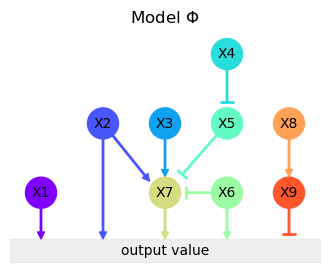

In [3]:
fig, ax = plt.subplots(figsize=(4, 3))

model = conf.simulator()
model.plot(ax=ax)
ax.set_title(model.name);

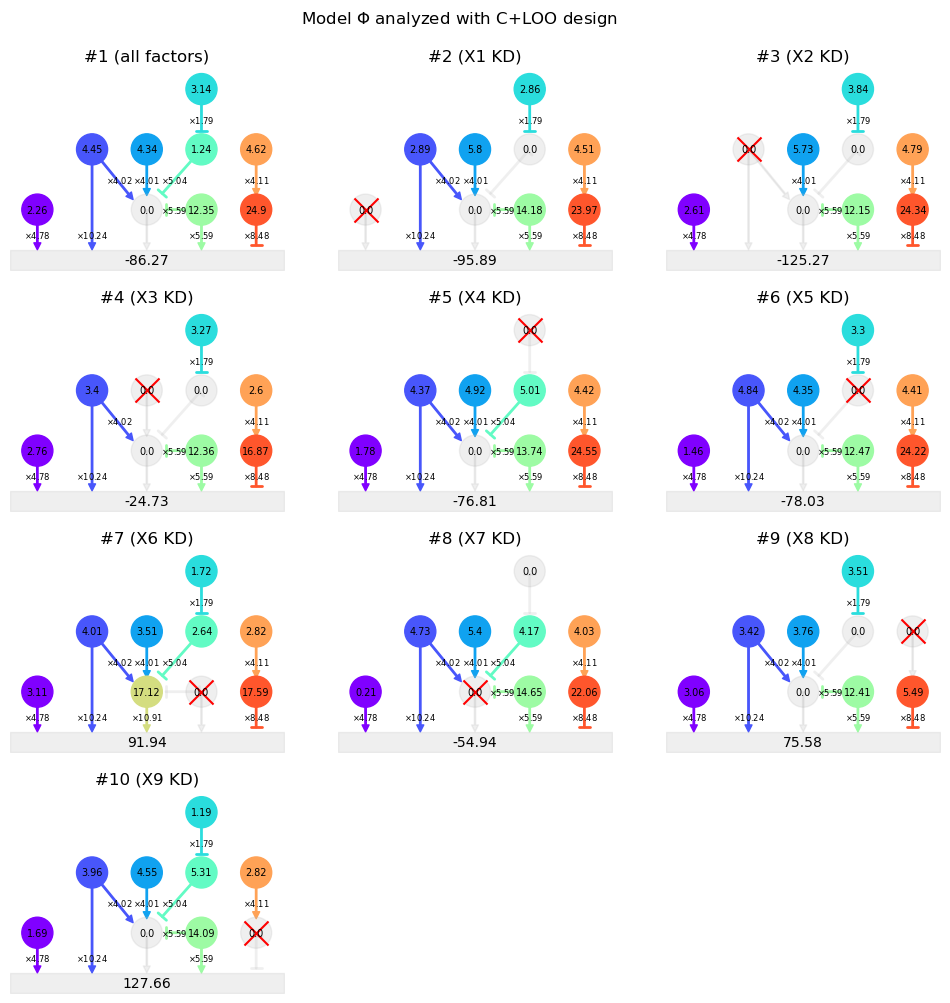

In [4]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model.simulate(
    design=conf.design, plot=True, ax=ax,
    titles=conf.run_names
)

fig.suptitle(f"{model.name} analyzed with {model.design().name} design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim{conf.suffix}", **kwarg_savefig)

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


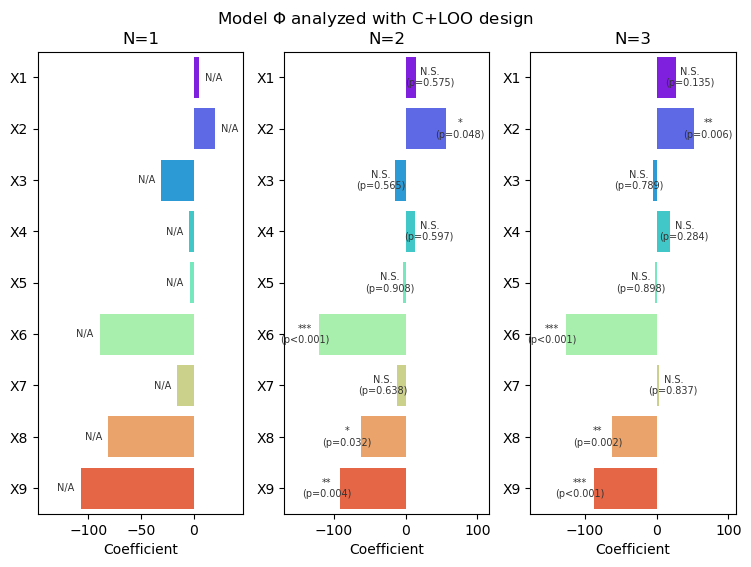

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, anova=True)

fig.suptitle(f"{model.name} analyzed with {model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/{conf.preffix}sim_mlr{conf.suffix}", **kwarg_savefig)

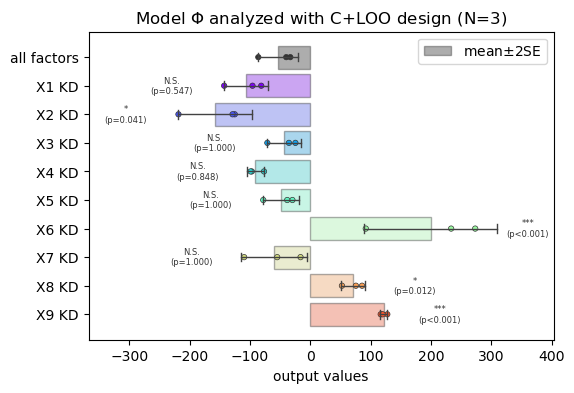

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

bio_multicomp(model, cmap=model.cmap, ax=ax, jitter_ratio=0.15, xscales=[1.5, 1.2])

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_res_n={model.metadata['n_rep']}_intuitive{conf.suffix}", **kwarg_savefig)